In [1]:
!pip install --upgrade pandas

Requirement already up-to-date: pandas in /opt/conda/lib/python3.6/site-packages (1.1.5)


In [2]:
#import useful libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#load in the dataset
df_show = pd.read_csv('clean_appointments.csv')
df_show.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show,age_group
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29 00:00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes,old
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29 00:00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,Yes,adult
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29 00:00:00,62,MATA DA PRAIA,0,0,0,0,0,0,Yes,old
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29 00:00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Yes,child
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29 00:00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,Yes,adult


In [4]:
df_show.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110526 entries, 0 to 110525
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   patientid       110526 non-null  float64
 1   appointmentid   110526 non-null  int64  
 2   gender          110526 non-null  object 
 3   scheduledday    110526 non-null  object 
 4   appointmentday  110526 non-null  object 
 5   age             110526 non-null  int64  
 6   neighbourhood   110526 non-null  object 
 7   scholarship     110526 non-null  int64  
 8   hipertension    110526 non-null  int64  
 9   diabetes        110526 non-null  int64  
 10  alcoholism      110526 non-null  int64  
 11  handcap         110526 non-null  int64  
 12  sms_received    110526 non-null  int64  
 13  show            110526 non-null  object 
 14  age_group       110526 non-null  object 
dtypes: float64(1), int64(8), object(6)
memory usage: 12.6+ MB


## Fix data type issue
> The dataset has previously been cleaned, but it's data type formatting was lost in converting from a dataframe to CSV, so I'll perform data type transformation on the new dataset

In [5]:
df_show['patientid'] = df_show['patientid'].astype('str')
type(df_show['patientid'][0])

str

In [6]:
df_show['appointmentid'] = df_show['appointmentid'].astype('str')
type(df_show['appointmentid'][0])

str

##### fix problem with scheduled day and appointment day

In [7]:
#convert feature to datetime for easy manipulation of data
df_show.scheduledday = pd.to_datetime(df_show.scheduledday)

In [8]:
df_show.appointmentday = pd.to_datetime(df_show.appointmentday)

##### convert categorical variables from other types to category

In [9]:
cat_var = ['gender','scholarship','hipertension',
          'diabetes', 'alcoholism', 'handcap',
          'sms_received', 'show']

In [10]:
for val in cat_var:
    df_show[val] = df_show[val].astype('category')

In [11]:
#create a mask for the values in the show feature of the 
#df_show dataframe
show = df_show.show == 'Yes'
no_show= df_show.show == 'No'

In [12]:
# a function that masks a part of a data
#maps 1 to Yes, and 0 to No; after which it plots 
# a histogram of the data
def plot_varhist(x):
    df_show[x][show].map({1:'Yes',0:'No'}).hist(label='show', figsize=(8,8))
    df_show[x][no_show].map({1:'Yes',0:'No'}).hist(label='no_show')
    plt.xlabel(x, fontsize=13)
    plt.title('Effect of ' + x + ' on a patient\'s showing up', fontsize = 20)
    plt.ylabel('Number of patients', fontsize = 13)
    plt.legend()

In [13]:
# this function receives a column name as an argument
# gets the value_counts of that column
# then plots a bar chart of the data
def plot_val_count(x):
    var_count = df_show[x].value_counts()
    plt.bar(var_count.index[0], var_count[0], label= 'No')
    plt.bar(var_count.index[1], var_count[1], label= 'Yes')
    plt.title('Distribution of patient\'s by '+ x, fontsize=20)
    plt.xlabel(x, fontsize=13)
    plt.ylabel('Number of patient\'s', fontsize=13)
    plt.legend()

In [14]:
# perform the groupby value_counts function
# it receives two arguments
def val_count_bygroup(x,y):
    group = df_show.groupby(x)[y].value_counts()
    return group

### Analysis 2: How does alcohol affect showing up?

In [15]:
df_show.alcoholism.value_counts()

0    107166
1      3360
Name: alcoholism, dtype: int64

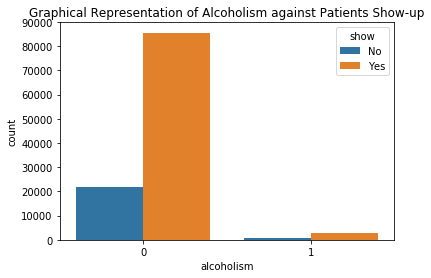

In [16]:
sns.countplot(x='alcoholism', hue='show', data = df_show);
plt.title('Graphical Representation of Alcoholism against Patients Show-up');

> The plot above shows that only a small fraction of the patients in this survey are alcoholics.
To give a correct insight into the data, let's find out the **percentage of non-alcoholic patients who keep their appointment** as well as the **percentage of alcoholic patients who keep their appointment**.

In [17]:
val_count_bygroup('alcoholism','show')

alcoholism  show
0           Yes     85524
            No      21642
1           Yes      2683
            No        677
Name: show, dtype: int64

> *ratio of non alcoholics that show up is* **85524/107166**

In [18]:
85524/107166

0.7980516208498964

>*ratio of alcoholics that show up is* **2683/3360**

In [19]:
2683/3360

0.7985119047619048

###### From the above we find that:

> about **79%** of persons are likely to keep their appointment irrespective of  their being alcoholics or non-alcoholics. Thus, alcoholism has a negligible impact on a patient's keeping an appointment.